##Ejemplo sencillo

n: [[ 56.  96.]]
result:  [[ 0.]] 

neighbours:  [[ 0.  0.  0.  1.  0.]] 

distance:  [[  533.  1000.  1285.  1345.  1885.]]


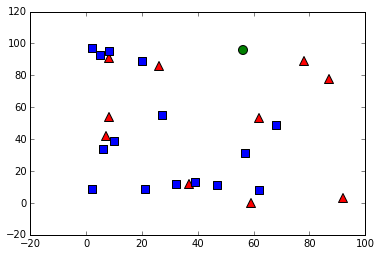

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Set de datos con los valores de 25 parejas (x,y) para entrenamiento
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

#Clase de cada pareja de datos Red o Blue con números 0 y 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)

#Graficamos los elementos de la clase Red
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

#Graficamos los elementos de la clase Blue
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

#Creamos un elemento nuevo que será clasificado entre las dos clases

#newcomer = np.array([[50., 27.]], dtype=np.float32)
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
print "n:",newcomer

plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'o')

#Realizamos el entrenamiento de k-nearest neighbour
# y clasificamos la nueva entrada
knn = cv2.KNearest()
knn.train(trainData, responses)
ret, results, neighbours, dist = knn.find_nearest(newcomer, 5)

print "result: ", results,"\n"
print "neighbours: ", neighbours, "\n"
print "distance: ", dist

plt.show()

##Digits Classification

In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Dividimos la imagen en 5000 celdas de tamaño 20x20
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]

#Convertir en un numpy array. El tamaño será de (50,100,20,20)
x = np.array(cells)

#Preparamos los datos de entrenamiento y prueba.
train = x[:,:50].reshape(-1,400).astype(np.float32) #Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) #Size = (2500,400)

#Crear las etiquetas para los datos de entrenamiento y prueba.
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

#Iniciar kNN, entrenar los datos y hacer la prueba.
knn = cv2.KNearest()
knn.train(train,train_labels)
ret, result, neighbours, dist = knn.find_nearest(test, k=5)

#Ahora revisar la precisión de la clasificación.
#Comparando los resultados con las etiqutetas de prueba.
matches = result == test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print "Accuracy: ", accuracy

Accuracy:  91.76


##Alphabet Classification

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Cargar los datos, convertir las letras a un número
data = np.loadtxt('letter-recognition.data', dtype='float32',
                  delimiter = ',', converters = {0: lambda ch: ord(ch)-ord('A')})

#Dividir los datos en dos, 10000 para cada set de entrenamiento y prueba.
train, test = np.vsplit(data, 2)

#Dividir los datos de entrenamiento y prueba en features y responses
responses, trainData = np.hsplit(train, [1])
labels, testData = np.hsplit(test, [1])

#Iniciar el kNN, clasificar y medir precisión.
knn = cv2.KNearest()
knn.train(trainData, responses)
ret, result, neighbours, dist = knn.find_nearest(testData, k=5)

correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
print "Accuracy: ", accuracy

Accuracy:  93.22
